<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Assignment - Part 1: Analyzing wildfire activities in Australia** 

Estimated time needed: **40** minutes


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
    </li>
    <li>
        <a href="#Dataset">Dataset</a>
    </li>
    <li><a href="#Importing Dataset">Importing Dataset</a></li>
    <li><a href="#Practice Tasks">Practice Tasks</a></li>
   


---


# Objectives

After completing this lab you will be able to:

 - Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts 


---


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
#%pip install seaborn
#%pip install folium

In [3]:
#!pip install folium

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [5]:
import urllib.request 
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"


response = urllib.request.urlopen(URL)

text = io.StringIO(response.read().decode('utf-8'))

df = pd.read_csv(text)

print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:


In [6]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [7]:
#List of column names from DataFrame 
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [8]:
#Data type of each column in the DataFrame 
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [9]:
import datetime as dt

#df['Year'] and df['Month']: These are new columns added to the DataFrame.
#The Year column will contain the year extracted from the 'Date' column.
#The Month column will contain the month extracted from the 'Date' column.

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


**Verify the columns again**


In [10]:
#verify the columns again after adding the new columns
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

---


## Practice Tasks


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


In [11]:
#Creating plot
plt.figure(figsize=(12, 6))

#Groups the data by the column 'Year' 
#and calculates the average of the 'Estimated_fire_area' for each year.
df_new = df.groupby('Year')['Estimated_fire_area'].mean()

#The result is a new DataFrame (df_new) where each index represents a year,
#and the corresponding value is the average estimated fire area for that year.
df_new

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
2010     62.429968
2011    266.936175
2012    265.526196
2013     95.896092
2014    144.007348
2015    133.196719
2016     82.674717
2017    156.060061
2018    162.030426
2019    160.607150
2020     72.669665
Name: Estimated_fire_area, dtype: float64

<Figure size 1200x600 with 0 Axes>

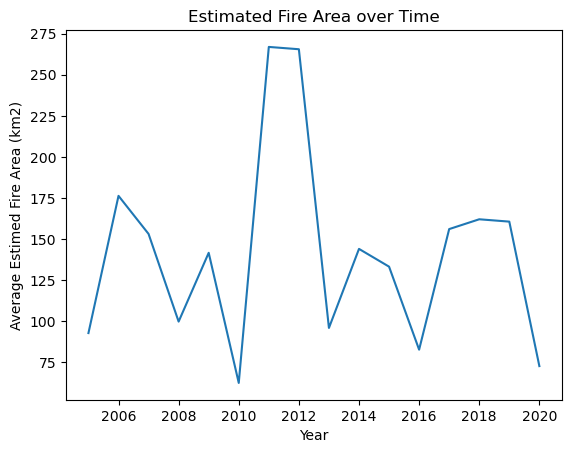

In [12]:
#Line plot: 'Estimated Fire Area over Time'

#df_new.index represents the years 
#df_new.values represent the average estimated fire area for those years.
#The plot function uses the index as the x-axis (years) and
#values as the y-axis (average estimated fire area).

df_new.plot(x = df_new.index, y = df_new.values)
#df_new.plot() will produce the same result since
 
#Pandas automatically 
#uses the index as the x-axis and 
#the values as the y-axis by default

plt.xlabel('Year')

plt.ylabel('Average Estimed Fire Area (km2)')

plt.title('Estimated Fire Area over Time')

plt.show()

---


### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


In [13]:
#Grouping the data by both 'Year' and 'Month', 
#and calculating the average of 'Estimated_fire_area'

#For each unique combination of Year and Month,
#the code calculates the average of the 'Estimated_fire_area' values.
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

df_new.head(13)
#The result is a new Pandas Series (df_new)
#where the multi-level index (MultiIndex)
#is composed of both Year and Month, and the 
#values are the average estimated fire area for each of these combinations.

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
      6         53.008088
      7         68.894702
      8         85.339337
      9        114.282408
      10       177.676820
      11       163.266122
      12       111.906784
2006  1         71.647220
Name: Estimated_fire_area, dtype: float64

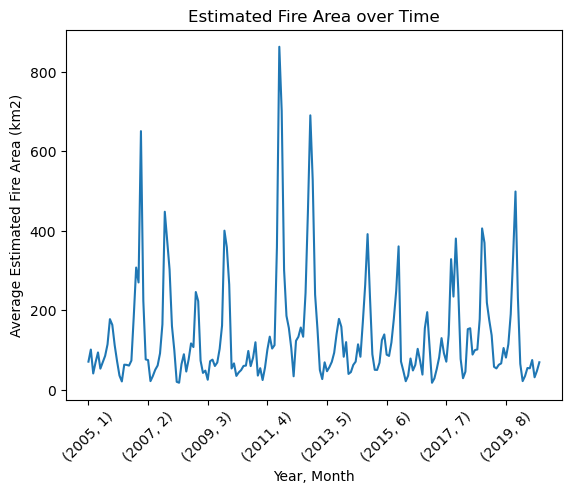

In [14]:
#Line plot: 'Estimated Fire Area over Time'
df_new.plot(x = df_new.index, y = df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km2)')
plt.title('Estimated Fire Area over Time')
plt.xticks(rotation=45)
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)


In [15]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

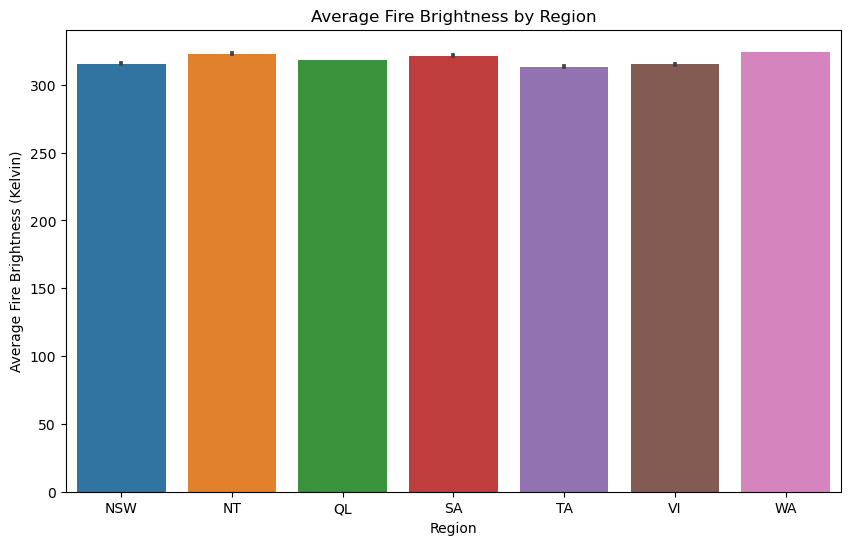

In [16]:
#Bar graph: 'Average Fire Brightness by Region'
plt.figure(figsize=(10, 6))

sns.barplot(data = df, x = 'Region', y = 'Mean_estimated_fire_brightness')

plt.xlabel('Region')

plt.ylabel('Average Fire Brightness (Kelvin)')

plt.title('Average Fire Brightness by Region')

plt.show()

---


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


In [17]:
#Creating a pie chart
plt.figure(figsize=(10, 6))

#Grouping the data by the unique values in the 'Region' column 
#and then calculating the total sum of values in the 'Count' column
#for each group
region_counts = df.groupby('Region')['Count'].sum()

<Figure size 1000x600 with 0 Axes>

In [18]:
#New Pandas Series:
#the index -> unique region names
#the values-> total sum of the 'Count' for each region
region_counts

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

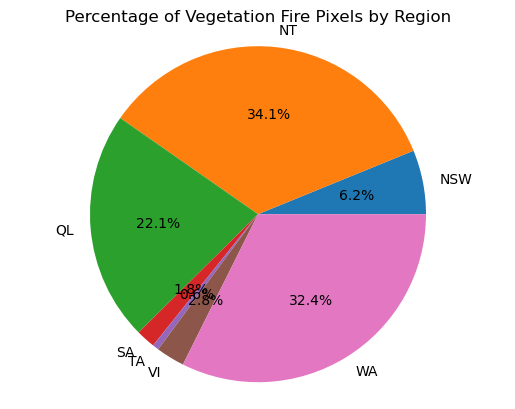

In [19]:
#Pie chart: 'Percentage of Vegetation Fire Pixels by Region'

#Labels are set to the region names(index), 
#and autopct is used to display percentage

#'%1.1f%%' -> (format specifier) Indicates a floating-point number with 
#one digit before and after the decimal point.

plt.pie(region_counts, labels = region_counts.index, autopct = '%1.1f%%') 

plt.title('Percentage of Vegetation Fire Pixels by Region')

# This ensures that the pie chart is drawn as a circle rather than an ellipse.
plt.axis('equal')

plt.show()

### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


In [20]:
#Example of What’s Generated:
#'NSW', 6.17 
print(region_counts['NSW'])
print(region_counts.sum())
print((117412/1902798) * 100)

117412
1902798
6.170492085865131


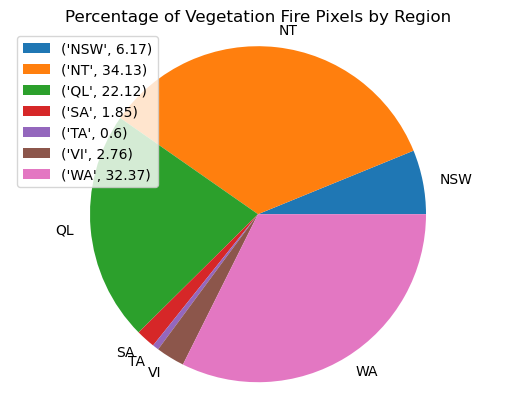

In [21]:
#Pie chart: 'Percentage of Vegetation Fire Pixels by Region'
plt.pie(region_counts, labels = region_counts.index)

plt.title('Percentage of Vegetation Fire Pixels by Region')

#zip(region_counts.index, region_counts):
#Pairs each region label (region_counts.index) with the corresponding value (region_counts). 
# i-> name of region 
# k-> count for that region 

# k / region_counts.sum() * 100 calculates the percentage of the total count that is represented by the current region (k).
# k / region_counts.sum() * 100 -> (117412 / 1902798) * 100 = 6.17

#Example of What’s Generated:'NSW', 6.17 
#This tells the legend to display RegionName followed by the contribution of that region.

#Using list comprehension to generate a list of tuples for each region
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])

#This ensures that the pie chart is drawn as a circle rather than an ellipse.
plt.axis('equal')

plt.show()

---


### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


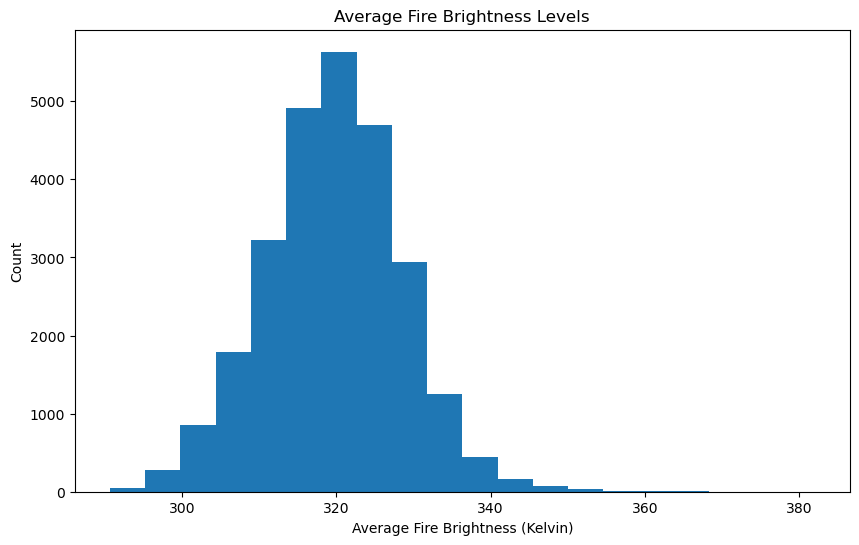

In [25]:
#Histogram: 'Average Fire Brightness Levels'

plt.figure(figsize=(10, 6))

#Setting the number of bins to 20 for better visualization
plt.hist(x = df['Mean_estimated_fire_brightness'], bins = 20)

plt.xlabel('Average Fire Brightness (Kelvin)')

plt.ylabel('Count')

plt.title('Average Fire Brightness Levels')

plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


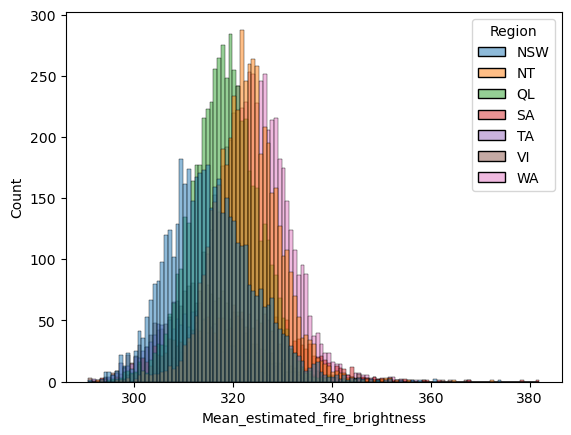

In [26]:
#Histogram: 'Average Fire Brightness Levels By Regions' using Seaborn

#Creating a histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
#Using sns.histplot to create the histogram
#Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
#Adding hue='Region' to differentiate the distribution across regions

sns.histplot(data = df, x = 'Mean_estimated_fire_brightness', hue = 'Region')

plt.show()


### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


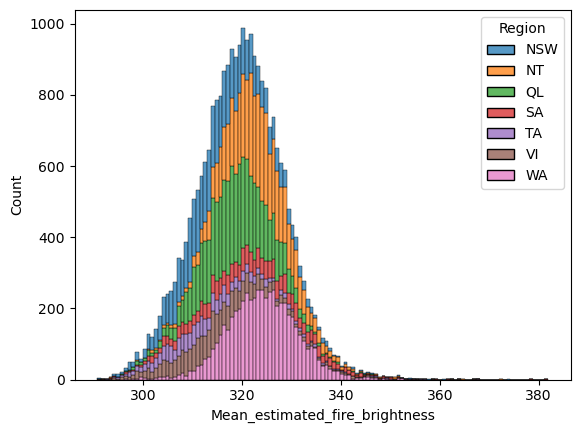

In [27]:
# Histogram: 'Mean_estimated_fire_brightness' using multiple = 'stack'

# Setting multiple='stack' to stack the histograms for different regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

---


### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


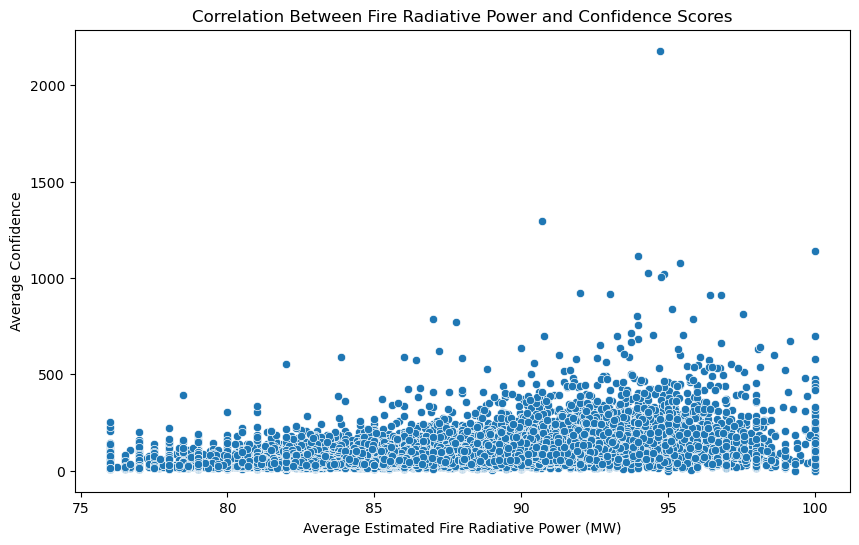

In [29]:
#Scatterplot: 'Correlation Between Fire Radiative Power and Confidence Scores'

plt.figure(figsize=(10, 6))

sns.scatterplot(data = df, x = 'Mean_confidence', y = 'Mean_estimated_fire_radiative_power')

plt.xlabel('Average Estimated Fire Radiative Power (MW)')

plt.ylabel('Average Confidence')

plt.title('Correlation Between Fire Radiative Power and Confidence Scores')

plt.show()



---


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [30]:
#Creating a DataFrame for Regional Data:
#'region': List of region abbreviations 
#'Lat' and 'Lon': Latitude and Longitude values for each region
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [31]:
#Creating a Feature Group and a Folium Map
#A FeatureGroup is used to group different map elements that can be added to the map in one step.

aus_reg = folium.map.FeatureGroup() #Creates a FeatureGroup named aus_reg 

Aus_map = folium.Map(location = [-25, 135], zoom_start = 4) #Initializes a Folium map centered roughly on Australia (location=[-25, 135]).

#Loop through each region's latitude, longitude, and name to add markers to the map
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    # Add a CircleMarker for each region to the aus_reg feature group
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup = lab,
            radius = 5, # define how big you want the circle markers to be
            color = 'red',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )

# Adds the FeatureGroup (aus_reg) containing all the CircleMarkers to the map (Aus_map).
Aus_map.add_child(aus_reg)



---


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


#### Copyright © 2023 IBM Corporation. All rights reserved.
```{toggle}## Change Log
```


```{toggle}|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
```

```{toggle}|-|-|-|-|
```
```{toggle}|2023-06-281|0.2|Dr. Pooja|Initial Lab Creation|
```
```{toggle}|2023-05-01|0.1|Shengkai|Create Lab Template|
```
